**Antes que nada correr esta celda para poder usar julia**

In [ ]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

Despues de ejecutar la celda de arriba, Vamos a la barra de opciones de google colab y tocamos en **Editar** y despues en **Configuración del cuaderno** que está abajo de todo casi. Seleccionamos *Julia 1.6* en Tipo de Entorno de Ejecución. Y si queremos cambiamos el acelerador por hardware (default en GPU, les recomiendo que lo saquen). 

<br/>Editar y configuración

> ![Colab Img](https://i.imgur.com/7XLVAMN.png)

<br/>Esta es la configuración que deberian tener:

> ![Colab Img](https://i.imgur.com/UasidBO.png)

<br/>No se olviden de guardar.
<br/>**Arrancamos nomas, recuerden que siempre que se reinicie el entorno o lo que sea ejecuten esto**.






In [2]:
VERSION #Para ver la version de julia

v"1.6.1"

Data

In [ ]:
println("Prueba")

Prueba


In [3]:
import Pkg
Pkg.add("CSV")
using CSV

using Pkg
Pkg.add("Plots")
using Plots

using Pkg
Pkg.add("DataFrames")
using DataFrames

Leer un CSV


In [3]:
csv_reader = CSV.File("Spotify-2000.csv")
println(typeof(csv_reader))

CSV.File{false}


DF completo

In [ ]:
df = DataFrame(CSV.File("Spotify-2000.csv"))


Mostrar filas del primero hacia abajo, la cantidad necesaria

In [ ]:
first(df, 5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM)
,Int64,String,String,String,Int64,Int64
1,1,Sunrise,Norah Jones,adult standards,2004,157
2,2,Black Night,Deep Purple,album rock,2000,135
3,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168
4,4,The Pretender,Foo Fighters,alternative metal,2007,173
5,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106


Acceder a un elemento en especifico

In [ ]:
df[2, 2]

"Black Night"

Columna especifica

In [ ]:
df[!, :Title]

1994-element Vector{String}:
 "Sunrise"
 "Black Night"
 "Clint Eastwood"
 "The Pretender"
 "Waitin' On A Sunny Day"
 "The Road Ahead (Miles Of The Unknown)"
 "She Will Be Loved"
 "Knights of Cydonia"
 "Mr. Brightside"
 "Without Me"
 "Love Me Tender"
 "Seven Nation Army"
 "Als Het Golft"
 ⋮
 "Get Ready"
 "Black Magic Woman - 2018 Remaster"
 "Suite: Judy Blue Eyes - Remastered"
 "Blue Suede Shoes"
 "Jailhouse Rock"
 "My Baby Just Cares for Me - 2013 Remastered Version"
 "Summertime"
 "Heartbreak Hotel"
 "Hound Dog"
 "Johnny B. Goode"
 "Take Five"
 "Blueberry Hill"

Grafico generico de prueba

In [32]:
x = 1:10; y = rand(10); # These are the plotting data
#plot(x, y)
x

1:10

Value counts


In [5]:
df2 = combine(groupby(df, [:Artist]), nrow => :count)

,Artist,count
,String,Int64
1,Norah Jones,2
2,Deep Purple,4
3,Gorillaz,2
4,Foo Fighters,9
5,Bruce Springsteen,23
6,City To City,1
7,Maroon 5,2
8,Muse,15
9,The Killers,3


In [ ]:
sort!(df2, [:count], rev = true)

,Artist,count
,String,Int64
1,Queen,37
2,The Beatles,36
3,Coldplay,27
4,U2,26
5,The Rolling Stones,24
6,Bruce Springsteen,23
7,Michael Jackson,23
8,ABBA,22
9,David Bowie,21


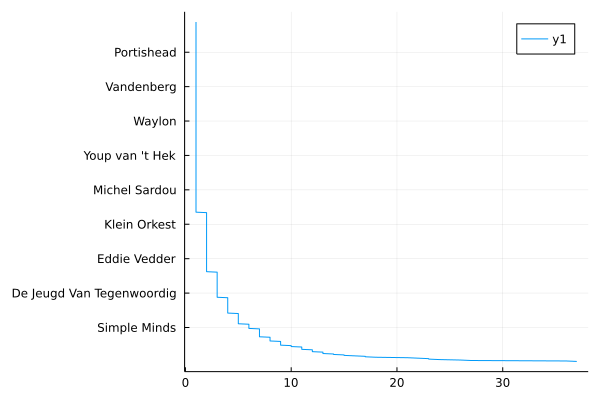

In [ ]:
x = df2[!, :count]; y = df2[!, :Artist] 
plot(x, y)

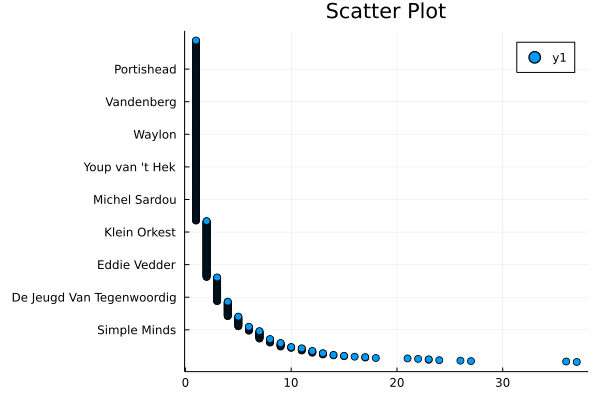

In [ ]:
x = df2[!, :count]; y = df2[!, :Artist] 
scatter(x, y, title = "Scatter Plot")

In [4]:
function Fibonacci(numero)
           if numero < 2
               return numero
           else
               return Fibonacci(numero-1)+Fibonacci(numero-2)
           end
       end

Fibonacci (generic function with 1 method)

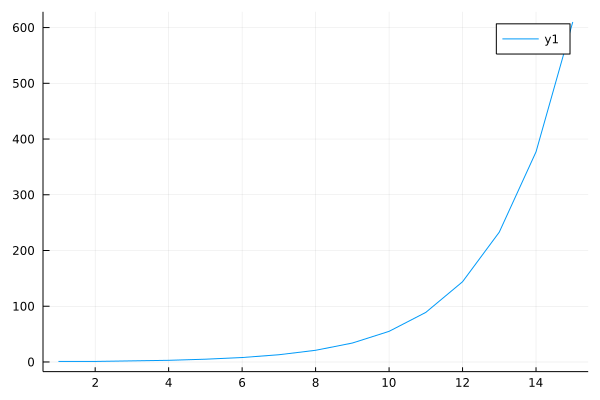

In [5]:
x = 1:15;
#y = Fibonacci(x); # These are the plotting data
plot(x, Fibonacci)